# Problem Statement
- For a hotel website: collect info about the feedback for items available in hotels  like -good/bad/spicy count the number of feedbacks for each category write a logic to generate the graph for that with python Note: Sample database and excel sheets can be taken from google and visit  you tube video's for more data on these
    - The following is the analysis of the food in the hotel on the basis : Good/Bad/Spicy

### Importing libraries and reading csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\Hotel_Feedback_Task\Hotel reviews.csv")

### EDA on the dataset

In [3]:
df.head(10)

,Hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,meal,Reviewer,Review,Rating
0,Stellar Hotel,0,342,2015,July,27,1,0,0,2,...,PRT,0,0,0,C,C,BB,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5
1,Stellar Hotel,0,737,2015,July,27,1,0,0,2,...,PRT,0,0,0,C,C,BB,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5
2,Stellar Hotel,0,7,2015,July,27,1,0,1,1,...,GBR,0,0,0,A,C,BB,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5
3,Stellar Hotel,0,13,2015,July,27,1,0,1,1,...,GBR,0,0,0,A,A,BB,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5
4,Stellar Hotel,0,14,2015,July,27,1,0,2,2,...,GBR,0,0,0,A,A,BB,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5
5,Stellar Hotel,0,14,2015,July,27,1,0,2,2,...,GBR,0,0,0,A,A,BB,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5
6,Stellar Hotel,0,0,2015,July,27,1,0,2,2,...,PRT,0,0,0,C,C,BB,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5
7,Stellar Hotel,0,9,2015,July,27,1,0,2,2,...,PRT,0,0,0,C,C,HB,Sandhya S,Well after reading so many reviews finally vis...,4
8,Stellar Hotel,1,85,2015,July,27,1,0,3,2,...,PRT,0,0,0,A,A,BB,Akash Thorat,"Excellent food , specially if you like spicy f...",5
9,Stellar Hotel,1,75,2015,July,27,1,0,3,2,...,PRT,0,0,0,D,D,HB,Smarak Patnaik,Came for the birthday treat of a close friend....,5


In [4]:
df.shape

(10000, 22)

In [5]:
df.columns

Index(['Hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'meal', 'Reviewer', 'Review', 'Rating'],
      dtype='object')

In [6]:
df['Hotel'].unique()

array(['Stellar Hotel', 'Vortex Hotel', 'Exalted Resort'], dtype=object)

In [7]:
df.count()

Hotel                             10000
is_canceled                       10000
lead_time                         10000
arrival_date_year                 10000
arrival_date_month                10000
arrival_date_week_number          10000
arrival_date_day_of_month         10000
stays_in_weekend_nights           10000
stays_in_week_nights              10000
adults                            10000
children                          10000
babies                            10000
country                            9992
is_repeated_guest                 10000
previous_cancellations            10000
previous_bookings_not_canceled    10000
reserved_room_type                10000
assigned_room_type                10000
meal                              10000
Reviewer                           9962
Review                             9955
Rating                             9962
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Hotel                           10000 non-null  object
 1   is_canceled                     10000 non-null  int64 
 2   lead_time                       10000 non-null  int64 
 3   arrival_date_year               10000 non-null  int64 
 4   arrival_date_month              10000 non-null  object
 5   arrival_date_week_number        10000 non-null  int64 
 6   arrival_date_day_of_month       10000 non-null  int64 
 7   stays_in_weekend_nights         10000 non-null  int64 
 8   stays_in_week_nights            10000 non-null  int64 
 9   adults                          10000 non-null  int64 
 10  children                        10000 non-null  int64 
 11  babies                          10000 non-null  int64 
 12  country                         9992 non-null  

In [9]:
df.head()

,Hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,meal,Reviewer,Review,Rating
0,Stellar Hotel,0,342,2015,July,27,1,0,0,2,...,PRT,0,0,0,C,C,BB,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5
1,Stellar Hotel,0,737,2015,July,27,1,0,0,2,...,PRT,0,0,0,C,C,BB,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5
2,Stellar Hotel,0,7,2015,July,27,1,0,1,1,...,GBR,0,0,0,A,C,BB,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5
3,Stellar Hotel,0,13,2015,July,27,1,0,1,1,...,GBR,0,0,0,A,A,BB,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5
4,Stellar Hotel,0,14,2015,July,27,1,0,2,2,...,GBR,0,0,0,A,A,BB,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5


#### First we extract the words good/bad/spicy from the reviews column

In [11]:
import re

def extract_words_from_review(review):
    words_to_extract = ['good', 'bad', 'spicy']
    extracted_words = []
    for word in words_to_extract:
        if re.search(r'\b{}\b'.format(re.escape(word)), review, re.IGNORECASE):
            extracted_words.append(word)
            # If "spicy" or "bad" is found, stop searching for "good"
            if word == 'spicy' or word == 'bad':
                return word
    return ', '.join(extracted_words)

# Example dataset
dataset = df['Review']

for row in dataset:
    extracted_words = extract_words_from_review(row)
    print(extracted_words)

good
good

good
good
good

good
spicy
good

good
good
good


good
good
good
good

good
good
good
good
good
good
good
good
good
good
good
good
good
good
good



good
good
good
good
good
good




good

good
good
good
good
good
good
good
good

good
good
good

good


good
good
good
good
good
good
good
good
good
good
good
good


good
good
good




good
good

good

good
good
good


good

good
good
good
good

good
good
good

good
good


good
good
good
good


good
good
good
good

good
good

good
good

good
good
good
good
good

spicy
good
good
good

good
good
good

good
good
good
good
good
good

good
good
good
good
good
good

good
good

good


good
good
good
good
good
good
good
good

good
good
good
good
good
good

good
good
good
good
good

good
good

good
good
good
good
good
good
good
good
good
good
good
good
good
good

good

good
good

good

good
good
good
good
good
good
good
good
good


good
good
good

good
good
good


good

good
good
good

good

good
good

good
good
good
good
good
good
good


TypeError: expected string or bytes-like object

In [13]:
import pandas as pd
import re

def extract_words_from_review(review):
    if isinstance(review, str):
        words_to_extract = ['good', 'bad', 'spicy']
        extracted_words = []
        for word in words_to_extract:
            if re.search(r'\b{}\b'.format(re.escape(word)), review, re.IGNORECASE):
                extracted_words.append(word)
                # If "spicy" or "bad" is found, stop searching for "good"
                if word == 'spicy' or word == 'bad':
                    return word
        return ', '.join(extracted_words)
    else:
        return 'bad'


df['Review_word'] = df['Review'].apply(extract_words_from_review)
df.to_csv('Hotel review new.csv', index=False)

In [14]:
df.head()

,Hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,meal,Reviewer,Review,Rating,Review_word
0,Stellar Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,C,C,BB,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,good
1,Stellar Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,C,C,BB,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,good
2,Stellar Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,A,C,BB,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,
3,Stellar Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,0,A,A,BB,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,good
4,Stellar Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,0,A,A,BB,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,good


In [15]:
df.replace(r'', 'bad', inplace=True)

### Data cleaning

In [16]:
df.isnull().sum()

Hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
babies                             0
country                            8
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
meal                               0
Reviewer                          38
Review                            45
Rating                            38
Review_word                        0
dtype: int64

In [17]:
#Simply did dropna to remove the rows as the null values are very less as compared to the data
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

Hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
meal                              0
Reviewer                          0
Review                            0
Rating                            0
Review_word                       0
dtype: int64

### Analysis and visualization

In [19]:
df['Review_word'].unique()

array(['good', 'bad', 'spicy'], dtype=object)

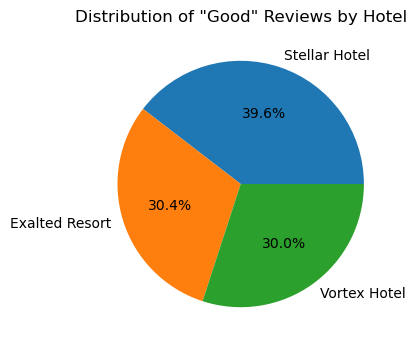

In [32]:
good_reviews_df = df[df['Review_word'].str.contains('good', case=False)]
hotel_counts = good_reviews_df['Hotel'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Good" Reviews by Hotel',fontsize=12)
plt.show()

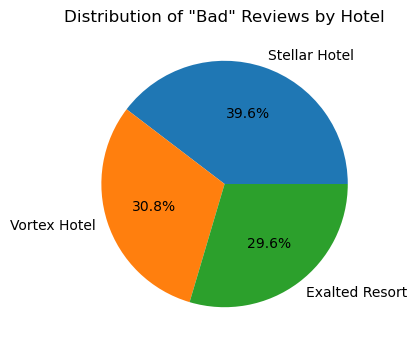

In [21]:
good_reviews_df = df[df['Review_word'].str.contains('bad', case=False)]
hotel_counts = good_reviews_df['Hotel'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Bad" Reviews by Hotel')
plt.show()

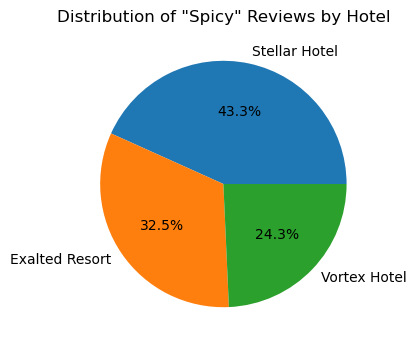

In [22]:
good_reviews_df = df[df['Review_word'].str.contains('spicy', case=False)]
hotel_counts = good_reviews_df['Hotel'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Spicy" Reviews by Hotel')
plt.show()

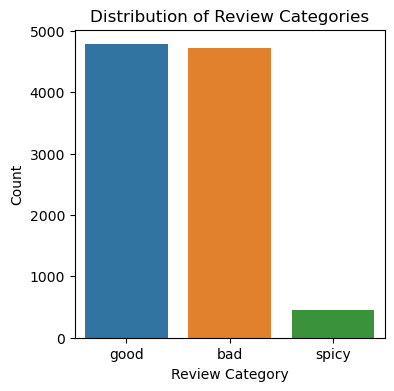

In [23]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Review_word', data=df)
plt.xlabel('Review Category')
plt.ylabel('Count')
plt.title('Distribution of Review Categories')
plt.show()

In [34]:
df['Review_word'].value_counts(normalize = True)

good     0.480398
bad      0.474065
spicy    0.045537
Name: Review_word, dtype: float64

#### Observing the graph above
- Enhance Positive Aspects: Focus on enhancing positive aspects like good service, ambiance, and food quality. Consistent, comfortable, and delicious experiences drive satisfaction.

- Address Negative Feedback: Address "bad" reviews promptly by improving service, resolving concerns, and addressing complaints to enhance overall guest experience.

- Offer a range of spice levels in menu options to cater to diverse preferences and enhance guest satisfaction.

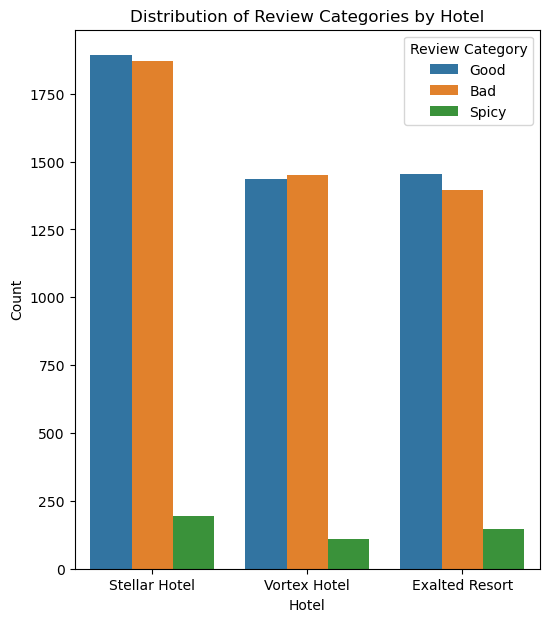

In [25]:
plt.figure(figsize=(6, 7)) 
sns.countplot(x='Hotel', hue='Review_word', data=df)
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Distribution of Review Categories by Hotel')
plt.legend(title='Review Category', labels=['Good', 'Bad', 'Spicy']) 

plt.show()

In [26]:
total_reviews_by_hotel = df['Hotel'].value_counts()
reviews_by_hotel_category = pd.crosstab(df['Hotel'], df['Review_word'])
reviews_by_hotel_category_percentage = reviews_by_hotel_category.div(total_reviews_by_hotel, axis=0) * 100
print(reviews_by_hotel_category_percentage)

Review_word           bad       good     spicy
Exalted Resort  46.562083  48.531375  4.906542
Stellar Hotel   47.244692  47.800809  4.954499
Vortex Hotel    48.464619  47.863818  3.671562


#### Observing the graph above

- **Exalted Resort**: Mostly positive reviews ('good'). Address the higher percentage of 'bad' reviews. Analyze negative feedback and take appropriate actions to enhance guest experience.

- **Stellar Hotel**: Stellar Hotel has a significant number of positive reviews ('good'). Addressing 'bad' reviews is crucial for an improved guest experience. Consistent efforts in resolving issues can lead to greater guest satisfaction.

- **Vortex Hotel**: Vortex Hotel should address concerns raised in 'bad' reviews and maintain positive feedback. Introducing more 'spicy' food options can cater to diverse guest preferences.

- **General Suggestions**: Encourage guest reviews for better understanding of preferences. Respond to reviews to show value for feedback and commitment to excellent service.

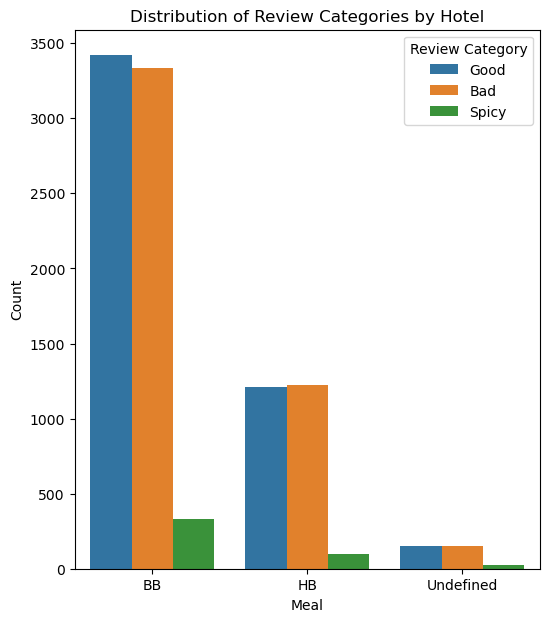

In [27]:
plt.figure(figsize=(6, 7)) 
sns.countplot(x='meal', hue='Review_word', data=df)
plt.xlabel('Meal')
plt.ylabel('Count')
plt.title('Distribution of Review Categories by Hotel')
plt.legend(title='Review Category', labels=['Good', 'Bad', 'Spicy']) 

plt.show()

In [28]:
total_reviews_by_hotel = df['meal'].value_counts()
reviews_by_hotel_category = pd.crosstab(df['meal'], df['Review_word'])
reviews_by_hotel_category_percentage = reviews_by_hotel_category.div(total_reviews_by_hotel, axis=0) * 100
print(reviews_by_hotel_category_percentage)

Review_word        bad       good     spicy
meal                                       
BB           47.080395  48.222849  4.696756
HB           48.401105  47.729964  3.868930
Undefined    46.769231  46.461538  6.769231


#### Observing the graph above¶
- BB (Bed and Breakfast): Mostly positive reviews, higher "good" than "bad" rating indicating satisfaction. Low "spicy" rating, offer diverse and spicier options.

- HB (Half Board): Positive reviews, investigate higher "bad" rating. Improve spicy options for low rating.

- Undefined (Meal type not specified): Mixed reviews, close "bad" and "good" ratings indicate balance. High "spicy" rating suggests success in spicy options, but focus on other aspects.

### Conclusion
The conclusion is that by analyzing and acting upon guest feedback, hotels can improve their services, address issues, and enhance guest satisfaction. Providing varied spice levels and attending to both positive and negative feedback contributes to a positive guest experience and builds a loyal customer base.